<a href="https://colab.research.google.com/github/olanaso/ExamenAutomatizacionTIG/blob/main/Examen_Final_Automatizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--COURSE_INFORMATION-->
**EXPOSICIÓN FINAL DE AUTOMATIZACIÓN DE DATOS EN SISTEMAS
DE INFORMACIÓN GEOGRÁFICA**  

<img align="left" style="padding-right:20px;" src="https://web2.unfv.edu.pe/Sitio/images/logo_unfv.png" width=20% />
<img align="right" style="padding-left:10px;" src="https://user-images.githubusercontent.com/16768318/73986811-764c6080-4936-11ea-9653-a3eacc47caed.png" width=10% />
<br>


****
****
****
****
****
****
###**ALUMNO :** Erick S. Escalante Olano
###**DOCENTE :** Mg. Risco Sence, Eber Rostaing
 
Lima - 2021 




# RESÚMEN

En el presente trabajo se tendra como ambito de estudio lo siguiente:
****
### **AMBITO DE TRABAJO**
          
##### **DEPARTAMENTO :** AYACUCHO
##### **CUENCA       :** RIMAC



```
1. PLANTEAMIENTO DE UN ANALISIS DE ESTUDIO
2. ACCEDER A LOS DATOS
     DATOS DE ELEVACION Y DATOS DE SENSOR REMOTO MEDIANTE EL GOOGLE ENGINE
3. PROCESAMIENTO
    ANALISIS MOFORLOGICO A NIVEL DE UN VALLE 
    INDICES DE VEGETACION

```



# **I. Planteamiento del Problema**

#### 1.1 Acceso a datos de sensoramiento remoto desde GEE: Variables climáticas TERRACLIMATE para la Departamento de **AYACUCHO**
#### 1.2 Calculo de los Indices de vegetacion para la Cuenca de **RIMAC**
#### 1.3 Visualizacion de los Indices de vegetacion 

## **Folium** es una librería Python que permite crear mapas interactivos usando Leaflet. ... Lo que hace, de forma elegante, es crear código javascript que usa la maravillosa librería de mapas interactivos leaflet

Creamos una funcion que nos permita mostrar el Mapa

In [ ]:
#@title mapdisplay: Crea mapas interactivos usando folium
import folium
from folium import plugins
from folium.raster_layers import WmsTileLayer

def mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    center = center[::-1]
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)

    ##Cargando la base satelital para el Mapa
    url = (
    'http://services.arcgisonline.com/arcgis/rest/services/World_Imagery'
    + '/MapServer/tile/{z}/{y}/{x}'
    )
    WmsTileLayer(
    url=url,
    layers=None,
    name='ESRI Imagery',
    attr='ESRI World Imagery',
    ).add_to(mapViz)

    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k,
          style_function=lambda x: {'fillColor': '#228B22', 'color': '#1CEEFF','fillopacity':'0.0'}
          ).add_to(mapViz)

    

    mapViz.add_child(folium.LayerControl())

    #import plugins 
    #fullscreen
    plugins.Fullscreen().add_to(mapViz)
    #mouse position
    fmtr = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"
    plugins.MousePosition(position='topright', separator=' | ', prefix="Mouse:",lat_formatter=fmtr, lng_formatter=fmtr).add_to(mapViz)
    #Add the draw 
    plugins.Draw(export=True, filename='data.geojson', position='topleft', draw_options=None, edit_options=None).add_to(mapViz)  
    #Add measure tool 
    plugins.MeasureControl(position='topright', primary_length_unit='meters', secondary_length_unit='miles', primary_area_unit='sqmeters', secondary_area_unit='acres').add_to(mapViz)
 

    return mapViz

# **II. Visualizacion de Datos Climaticos de Ayacucho**
Descarga de data de clima 

[Code Google Earth Enginne](https://code.earthengine.google.com/)

```javascript
    var zona = ee.FeatureCollection("users/ErickSEscalanteOlano/Ayacucho");
    Map.addLayer(zona);
    //var dataset=ee.ImageCollection("IDAHO_EPSCOR/TERRACLIMATE")
    var dataset = ee.ImageCollection('IDAHO_EPSCOR/TERRACLIMATE')
                      .filter(ee.Filter.date('1981-01-01', '2021-01-01'));
    print(dataset.limit(5));
        var datos=dataset.median()
              .select(['aet','pet','pr','ro','soil','tmmn','tmmx','vs']);
    
    //Descargando al Google Drive la informacion de los climas 
    Export.image.toDrive({
    image: datos,
    description: 'terra_Ayacucho',
    scale: 1000,
    region: Region,
    crs:'EPSG:4326',
    maxPixels: 400000000000
    });
    
    
    
    Map.addLayer(datos.clip(zona),imageVisParam2,'Precipitacion')
```

## Instalacion de Geopandas

In [ ]:
pip install geopandas

## Instalacion de GDAL

In [ ]:
pip install gdal

## Instalacion de mapclassify 

In [ ]:
pip install mapclassify

## Instalacion de Rasterio

In [ ]:
pip install rasterio

     |████████████████████████████████| 19.1MB 252kB/s 


In [ ]:
#@title Permite ver los datos del drive de la cuenta de google
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


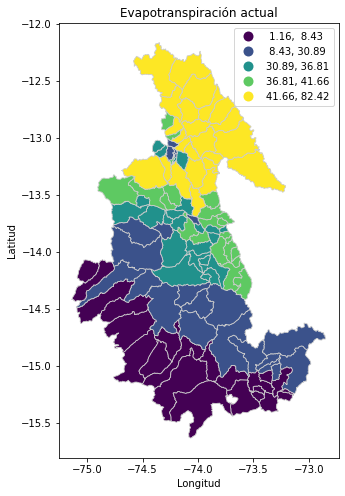

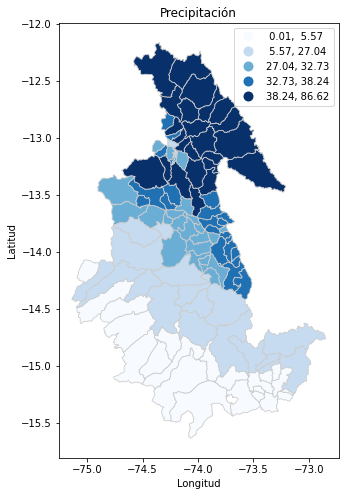

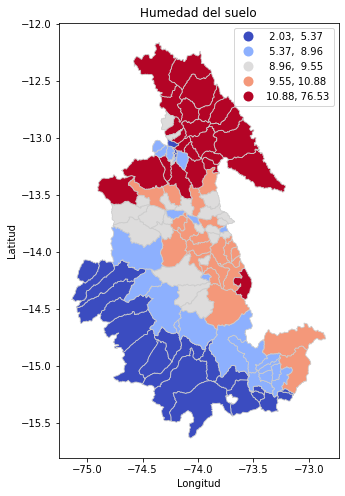

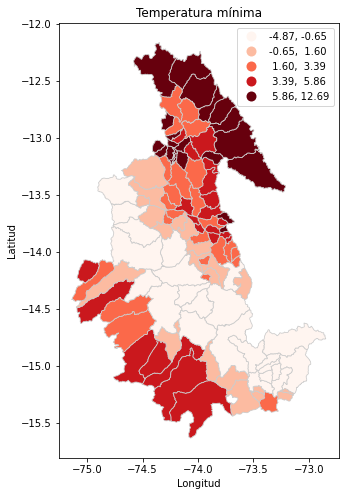

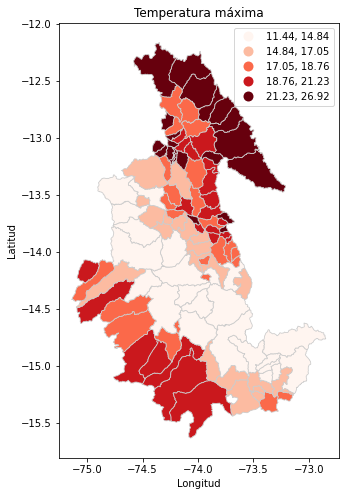

In [ ]:
#@title Ejecucion de script para la geneacion de las graficas 
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from osgeo import gdal
import rasterio
import fiona
import pandas as pd

fileshp = '/content/drive/My Drive/shcusco/Ayacucho.shp'
distritos_datos = gpd.read_file(fileshp)
type(distritos_datos)

#generacion de los graficos 
import mapclassify.classifiers as classifiers
names = ['aet','pet','pr','ro','soil','tmmn','tmmx','vs']
titulos =['Evapotranspiración actual','Evapotranspiración de referencia','Precipitación',
          'Escorrentía','Humedad del suelo','Temperatura mínima','Temperatura máxima',
          'Velocidad del viento a 10m']
colores = ['viridis','viridis','Blues','RdBu','coolwarm','Reds','Reds','bwr']

def generate_grafico(name,color,ax,k):
  return distritos_datos.plot(column=name, cmap=color, linewidth=0.8, edgecolor='0.8',
                       ax=ax,legend=True,scheme='Quantiles',k=k)

i=1
for name,titulo in zip(names,titulos):
  fig, ax = plt.subplots(1, figsize=(12, 8))
  #grafico=distritos_datos.plot(column=name, cmap=colores[i-1], linewidth=0.8, edgecolor='0.8',
   #                    ax=ax,legend=True,scheme='Quantiles',k=5)
  
  grafico= generate_grafico(name,colores[i-1],ax,5)
  grafico.set_title(titulo)
  grafico.set_xlabel('Longitud')
  grafico.set_ylabel('Latitud')
  i+=1
  plt.show()
  #Guarda en una ubicacion
  fig.savefig('/content/drive/My Drive/shcusco/fig_'+ str(name) +'.png')

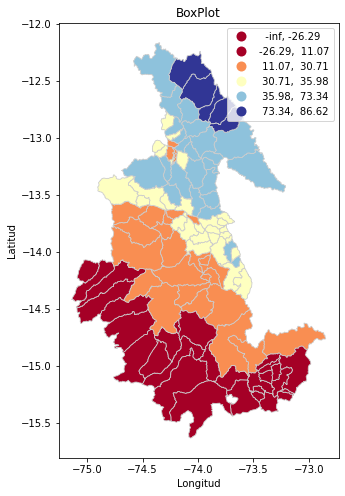

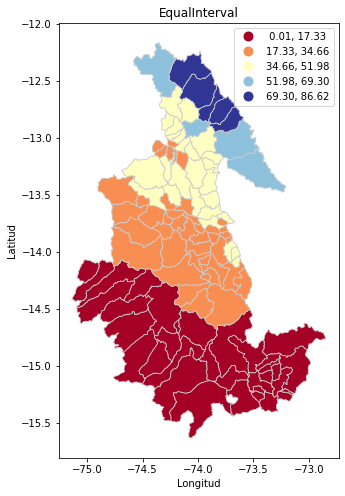

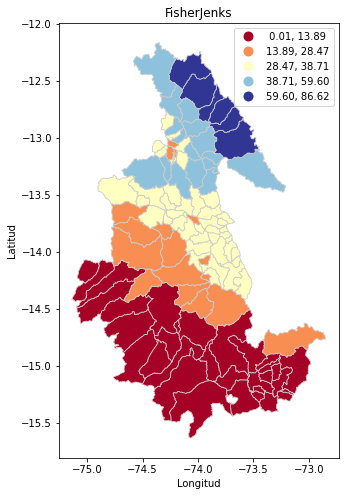

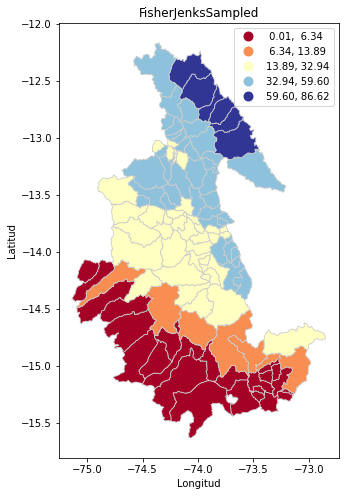

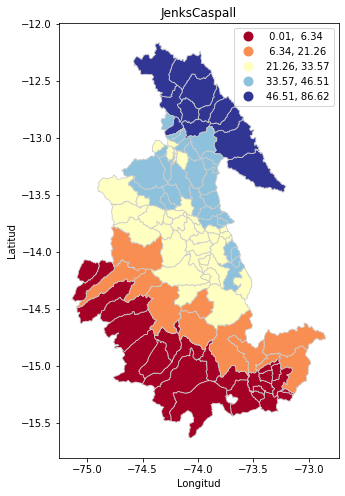

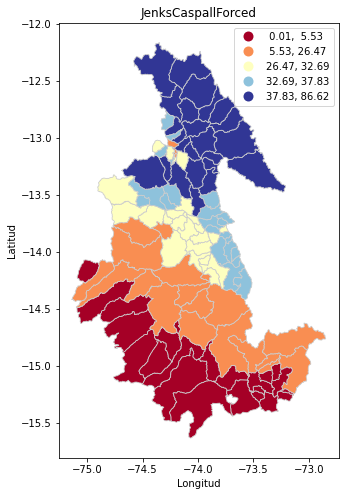

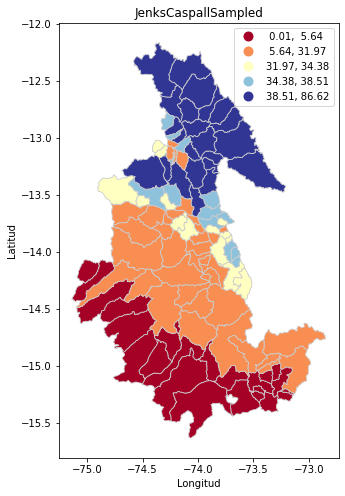

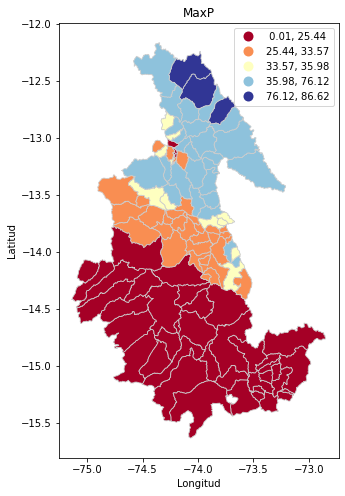

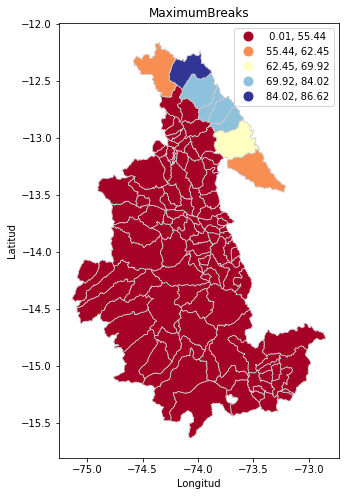

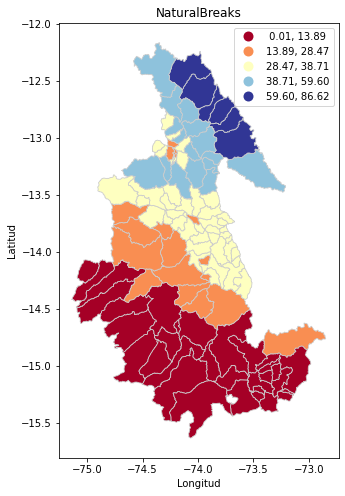

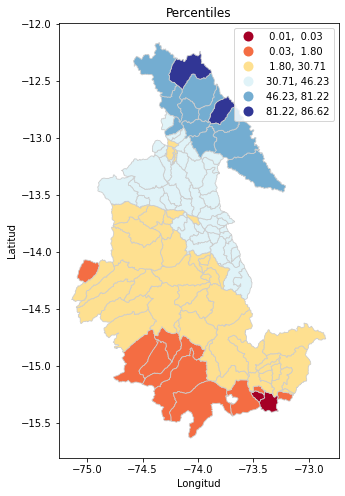

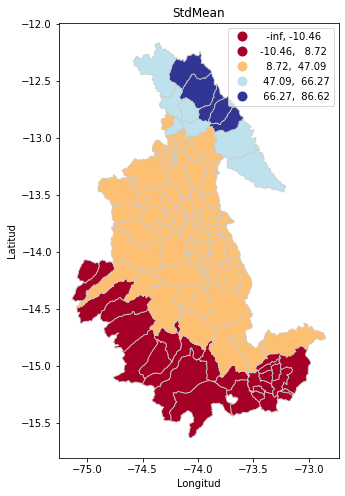

In [ ]:
#@title Generacion de las graficas  'BoxPlot', 'EqualInterval', 'FisherJenks', 'FisherJenksSampled',
metodos =['BoxPlot', 'EqualInterval', 'FisherJenks', 'FisherJenksSampled',
    'HeadTailBreaks', 'JenksCaspall', 'JenksCaspallForced',
    'JenksCaspallSampled', 'MaxP', 'MaximumBreaks',
    'NaturalBreaks', 'Quantiles', 'Percentiles', 'StdMean']

for metodo in metodos:
  fig, ax = plt.subplots(1, figsize=(12, 8))
  grafico=distritos_datos.plot(column='pr', cmap='RdYlBu', linewidth=0.8, edgecolor='0.8',
                       ax=ax,legend=True,scheme=metodo)
  grafico.set_title(metodo)
  grafico.set_xlabel('Longitud')
  grafico.set_ylabel('Latitud')
  i+=1
  plt.show()
  fig.savefig('/content/drive/My Drive/shcusco/fig_'+ str(metodo) +'.png')

# **III. Generacion de Indices de vegetación Cuenca de RIMAC**

## **1) Autenticar y inicializar GEE**

In [ ]:
!earthengine authenticate 

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=XPM45wHw24xEPSTP88wvq7nPaKPNSJ4KdqOQD3hhs_Y&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g6t7k3J-EjZ_M3721W4mFX5XqLMc952zlVJv2oORhf5Qf3cQjkYmzY

Successfully saved authorization token.


In [ ]:
import ee
ee.Initialize()

## **2)Mostrando el ambito de trabajo**

In [ ]:
demrimac = ee.Image('users/ErickSEscalanteOlano/DEM_RIMAC')

ayac_shp = ee.FeatureCollection('users/ErickSEscalanteOlano/Ayacucho')
cuencas = ee.FeatureCollection('users/ErickSEscalanteOlano/cuencas')
baseMaps = {'DEM RIMAC': demrimac.getMapId({'min':0,'max':200}),
               'Ayacucho': ayac_shp.getInfo(),
               'Cuenca': cuencas.getInfo()
               }
center = [-76,-12]
mapdisplay(center,baseMaps,zoom_start=7)

## **3) DESCARGANDO LA IMAGEN COPERNICUS COMO AMBITO LA CUENCA DEL RIO RIMAC**
[Code Google Earth Enginne](https://code.earthengine.google.com/)
```javascript
/**
 * Function to mask clouds using the Sentinel-2 QA band
 * @param {ee.Image} image Sentinel-2 image
 * @return {ee.Image} cloud masked Sentinel-2 image
 */
 
 var zona = ee.FeatureCollection("users/ErickSEscalanteOlano/cuencas");
    Map.addLayer(zona);
function maskS2clouds(image) {
  var qa = image.select('QA60');

  // Bits 10 and 11 are clouds and cirrus, respectively.
  var cloudBitMask = 1 << 10;
  var cirrusBitMask = 1 << 11;

  // Both flags should be set to zero, indicating clear conditions.
  var mask = qa.bitwiseAnd(cloudBitMask).eq(0)
      .and(qa.bitwiseAnd(cirrusBitMask).eq(0));

  return image.updateMask(mask).divide(10000);
}

// Map the function over one year of data and take the median.
// Load Sentinel-2 TOA reflectance data.
var dataset = ee.ImageCollection('COPERNICUS/S2')
                  .filterDate('2020-05-01', '2020-08-31')
                  // Pre-filter to get less cloudy granules.
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
                  .map(maskS2clouds);
                  
 print(dataset.limit(10))
  var imagen_mediana = dataset.median();
Map.addLayer(imagen_mediana,{},'Mediana');


Export.image.toDrive({
image: imagen_mediana,
description: 'img_nevado2',
scale: 10,
region: zona,
crs:'EPSG:32718', //32717 (zona17) y 32719 (zona19)
maxPixels: 4000000000000
} );
```

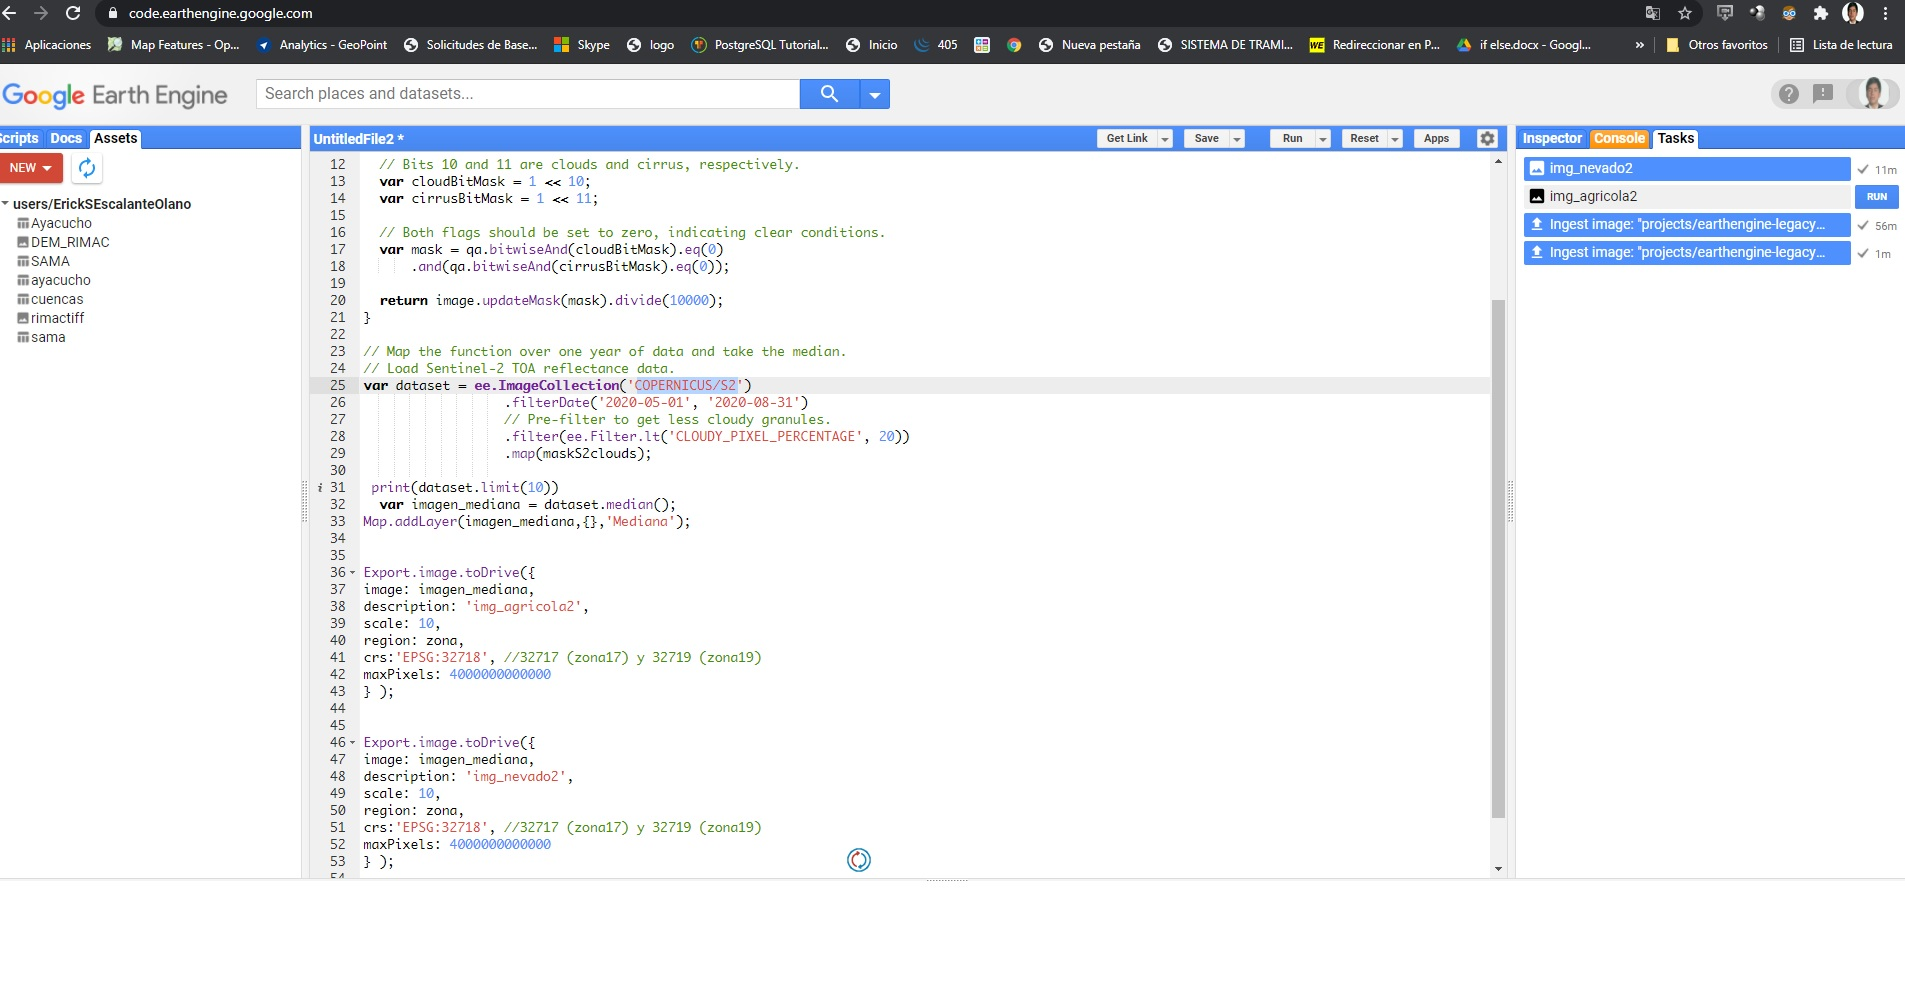

## **4) Subimos a nuestros assets del GEE el TIIF de rimac exportado al Drive**

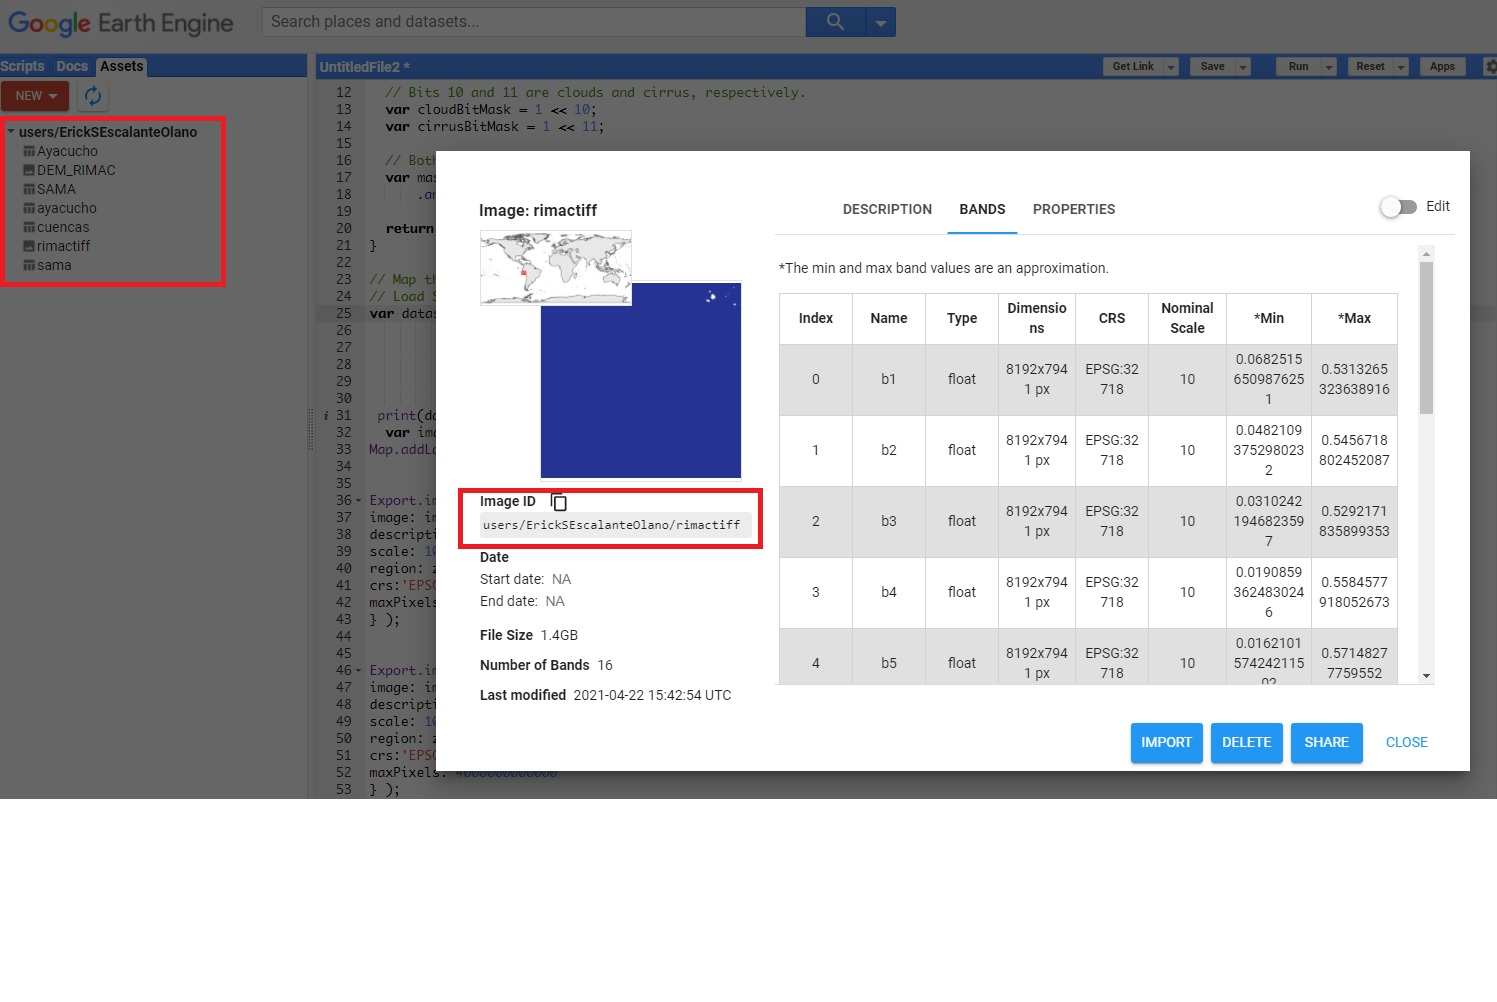

## **5) Listando los Indices Espectrales de la imagenes subidas a los Assets**

#### Detalle de las bandas de la Imagen https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2#bands

In [ ]:
#@title Indices Espectrales

img = ee.Image('users/ErickSEscalanteOlano/rimactiff')
centroid = img.geometry().centroid().getInfo()['coordinates']
img.bandNames().getInfo()


['b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'b12',
 'b13',
 'b14',
 'b15',
 'b16']

## **6) Mostrando la Imagen en el Mapa**

In [ ]:
mydicc = {'landsat8': img.getMapId({'min':0,'max':0.5,'bands':['b5','b4','b3']})}
mapdisplay(centroid, mydicc, Tiles="OpensTreetMap",zoom_start=9)

## **7)Definicion de las bandas a partir de la Imagen descargada**



In [ ]:
nir = img.select('b8')
red = img.select('b4')
blue = img.select('b2')
swir = img.select('b12')
green = img.select('b3')

## **8) Calculo del NDVI**
NDVI=(NIR-RED)/(NIR+RED)

In [ ]:
ndvi_01 = nir.subtract(red).divide(nir.add(red)).rename('NDVI')

## **9) Calculo de ARVI2 - Atmospherically Resistant Vegetation Index 2**
ARVI2=-0.18+1.17*NDVI

In [ ]:
arvi2= (nir.subtract(red).divide(nir.add(red)).multiply(1.17)).add(-0.18).rename('arvi2')

## **10)Calculo del EVI - Enhanced Vegetation Index**
EVI=2.5*(NIR-RED)/((NIR+6.0*RED-7.5*BLUE)+1)

In [ ]:
evi = img.expression(
    '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
        'NIR':nir,
        'RED': red,
        'BLUE': blue
    }).rename('EVI')


## **11) Calculo del TVI - Indice de vegetación transformado**
TVI = Power(NDVI + 0.5, 0.5)

In [ ]:
tvi = img.expression(
    '(NDVI + 0.5)** 0.5', {
        'NDVI':ndvi_01
    }).rename('TVI')

## **12) Calculo de RVI - Cociente índice de vegetación**
RVI = RED/NIR

In [ ]:
#RVI = RED/NIR
rvi = img.expression(
    'RED/NIR', {
        'RED':red,
        'NIR':nir
    }).rename('RVI')

## **13) SAVI - Índice de vegetación ajustado al suelo**

######L=0.5
######SAVI = ((NIR-RED)/(NIR+RED+L))*(1+L)

In [ ]:
#L=0.5
#SAVI = ((NIR-RED)/(NIR+RED+L))*(1+L)
savi = img.expression(
    '((NIR-RED)/(NIR+RED+L))*(1+L)', {
        'RED':red,
        'NIR':nir,
        'L': 0.5
    }).rename('SAVI')

## **14) GVMI Global Vegetation Moisture Index**
GVMI=((NIR+0.1)-(SWIR+0.02))/((NIR+0.1)+(SWIR+0.02))

In [ ]:
# GVMI=((NIR+0.1)-(SWIR+0.02))/((NIR+0.1)+(SWIR+0.02))
gvmi = img.expression(
    '((NIR+0.1)-(SWIR+0.02))/((NIR+0.1)+(SWIR+0.02))', {
        'RED':red,
        'NIR':nir,
        'SWIR': swir
    }).rename('GVMI')

## **15) # GLI - Green leaf index**
GLI=(2.0*GREEN-RED-BLUE)/(2.0*GREEN+RED+BLUE)

In [ ]:
gli = img.expression(
    '(2.0*GREEN-RED-BLUE)/(2.0*GREEN+RED+BLUE)', {
        'RED':red,
        'NIR':nir,
        'GREEN':green,
        'SWIR': swir,
        'BLUE': blue
    }).rename('GLI')

## **16) Mostrar en el Mapa con Folium**

In [ ]:
ndvi_palette = ["#051852", "#FFFFFF", "#C7B59B", "#A8B255", "#A3C020", "#76AD00","#429001", "#006400", "#003B00", "#000000"]
cuencas = ee.FeatureCollection('users/ErickSEscalanteOlano/cuencas')
mydicc = {
  'NDVI': ndvi_01.getMapId({'min':-0.1,'max':0.8,'palette':ndvi_palette}),
  'ARVI2': arvi2.getMapId({'min':-0.1,'max':0.8,'palette':ndvi_palette}),
  'EVI': evi.getMapId({'min':-0.1,'max':0.8,'palette':ndvi_palette}),
  'TVI': tvi.getMapId({'min':-0.1,'max':0.8,'palette':ndvi_palette}),
  'RVI': rvi.getMapId({'min':-0.1,'max':0.8,'palette':ndvi_palette}),
  'SAVI': savi.getMapId({'min':-0.1,'max':0.8,'palette':ndvi_palette}),
  'GVMI': gvmi.getMapId({'min':-0.1,'max':0.8,'palette':ndvi_palette}),
  'GLI': gli.getMapId({'min':-0.1,'max':0.8,'palette':ndvi_palette}),
  'Cuenca': cuencas.getInfo()
    
}  



mapdisplay(centroid, mydicc, Tiles="OpensTreetMap",zoom_start=9)

# **IV. Indices de Agua y Nieve en la Cuenca de RIMAC**

## **1) Indice de Agua**

### Índice de Agua
NDWI = (GREEN-NIR)/(GREEN+NIR)

In [ ]:
ndwi = img.expression(
    '(GREEN-NIR)/(GREEN+NIR)', {
        'RED':red,
        'NIR':nir,
        'GREEN':green,
        'SWIR': swir,
        'BLUE': blue
    }).rename('NDWI')

## **2) Indice de Nieve**

NDSI = (GREEN-SWIR1)/(GREEN+SWIR1)

In [ ]:
ndsi = img.expression(
    '(GREEN-SWIR1)/(GREEN+SWIR1)', {
        'RED':red,
        'NIR':nir,
        'GREEN':green,
        'SWIR1': swir,
        'BLUE': blue
    }).rename('NDWI')

## **3) Mostrando Resultados**

In [ ]:
agua_palette = ['00FFFF', '0000FF']
agua_nieve = ['000000', 'FFFFFF']
cuencas = ee.FeatureCollection('users/ErickSEscalanteOlano/cuencas')
mydicc = {
  'NDWI': ndwi.getMapId({'min':-0.1,'max':0.8,'palette':agua_palette}),
  'NDSI': ndsi.getMapId({'min':-0.1,'max':0.8,'palette':agua_nieve}),
  'Cuenca': cuencas.getInfo()
    
}  



mapdisplay(centroid, mydicc, Tiles="OpensTreetMap",zoom_start=9)

# **V. Conclusiones**

######Google Earth Engine incluyen la integración de diferentes conjuntos de datos a diferentes resoluciones, en este caso las imágenes Sentinel-1, Sentinel-2 y Landsat 8, a lo largo de diferentes intervalos de tiempo, de tal manera que las brechas en los datos y la mejora de la identificación de las características son posibles a través de la integración de múltiples imágenes.

######La visualizacion es mas rapida y dinamica haciendo uso del Google Colab, ya que gracias a Folium se tiene herramientas mas interactivas

######Sobre el procemiento de informacion en el Colab es notoriamente mejor que hacer en un PC



In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "drive/My Drive/Colab Notebooks/Examen_Final_Automatizacion.ipynb" ./

In [ ]:
!!jupyter nbconvert --to pdf Examen_Final_Automatizacion.ipynb

['[NbConvertApp] Converting notebook Examen_Final_Automatizacion.ipynb to pdf',
 '[NbConvertApp] Support files will be in Examen_Final_Automatizacion_files/',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_Automatizacion_files',
 '[NbConvertApp] Making directory ./Examen_Final_